In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [14]:
import seaborn as sns
import matplotlib as plt
import pandas as pd

In [15]:
filepath = '/kaggle/input/titanic/train.csv'
data = pd.read_csv(filepath).dropna()

In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

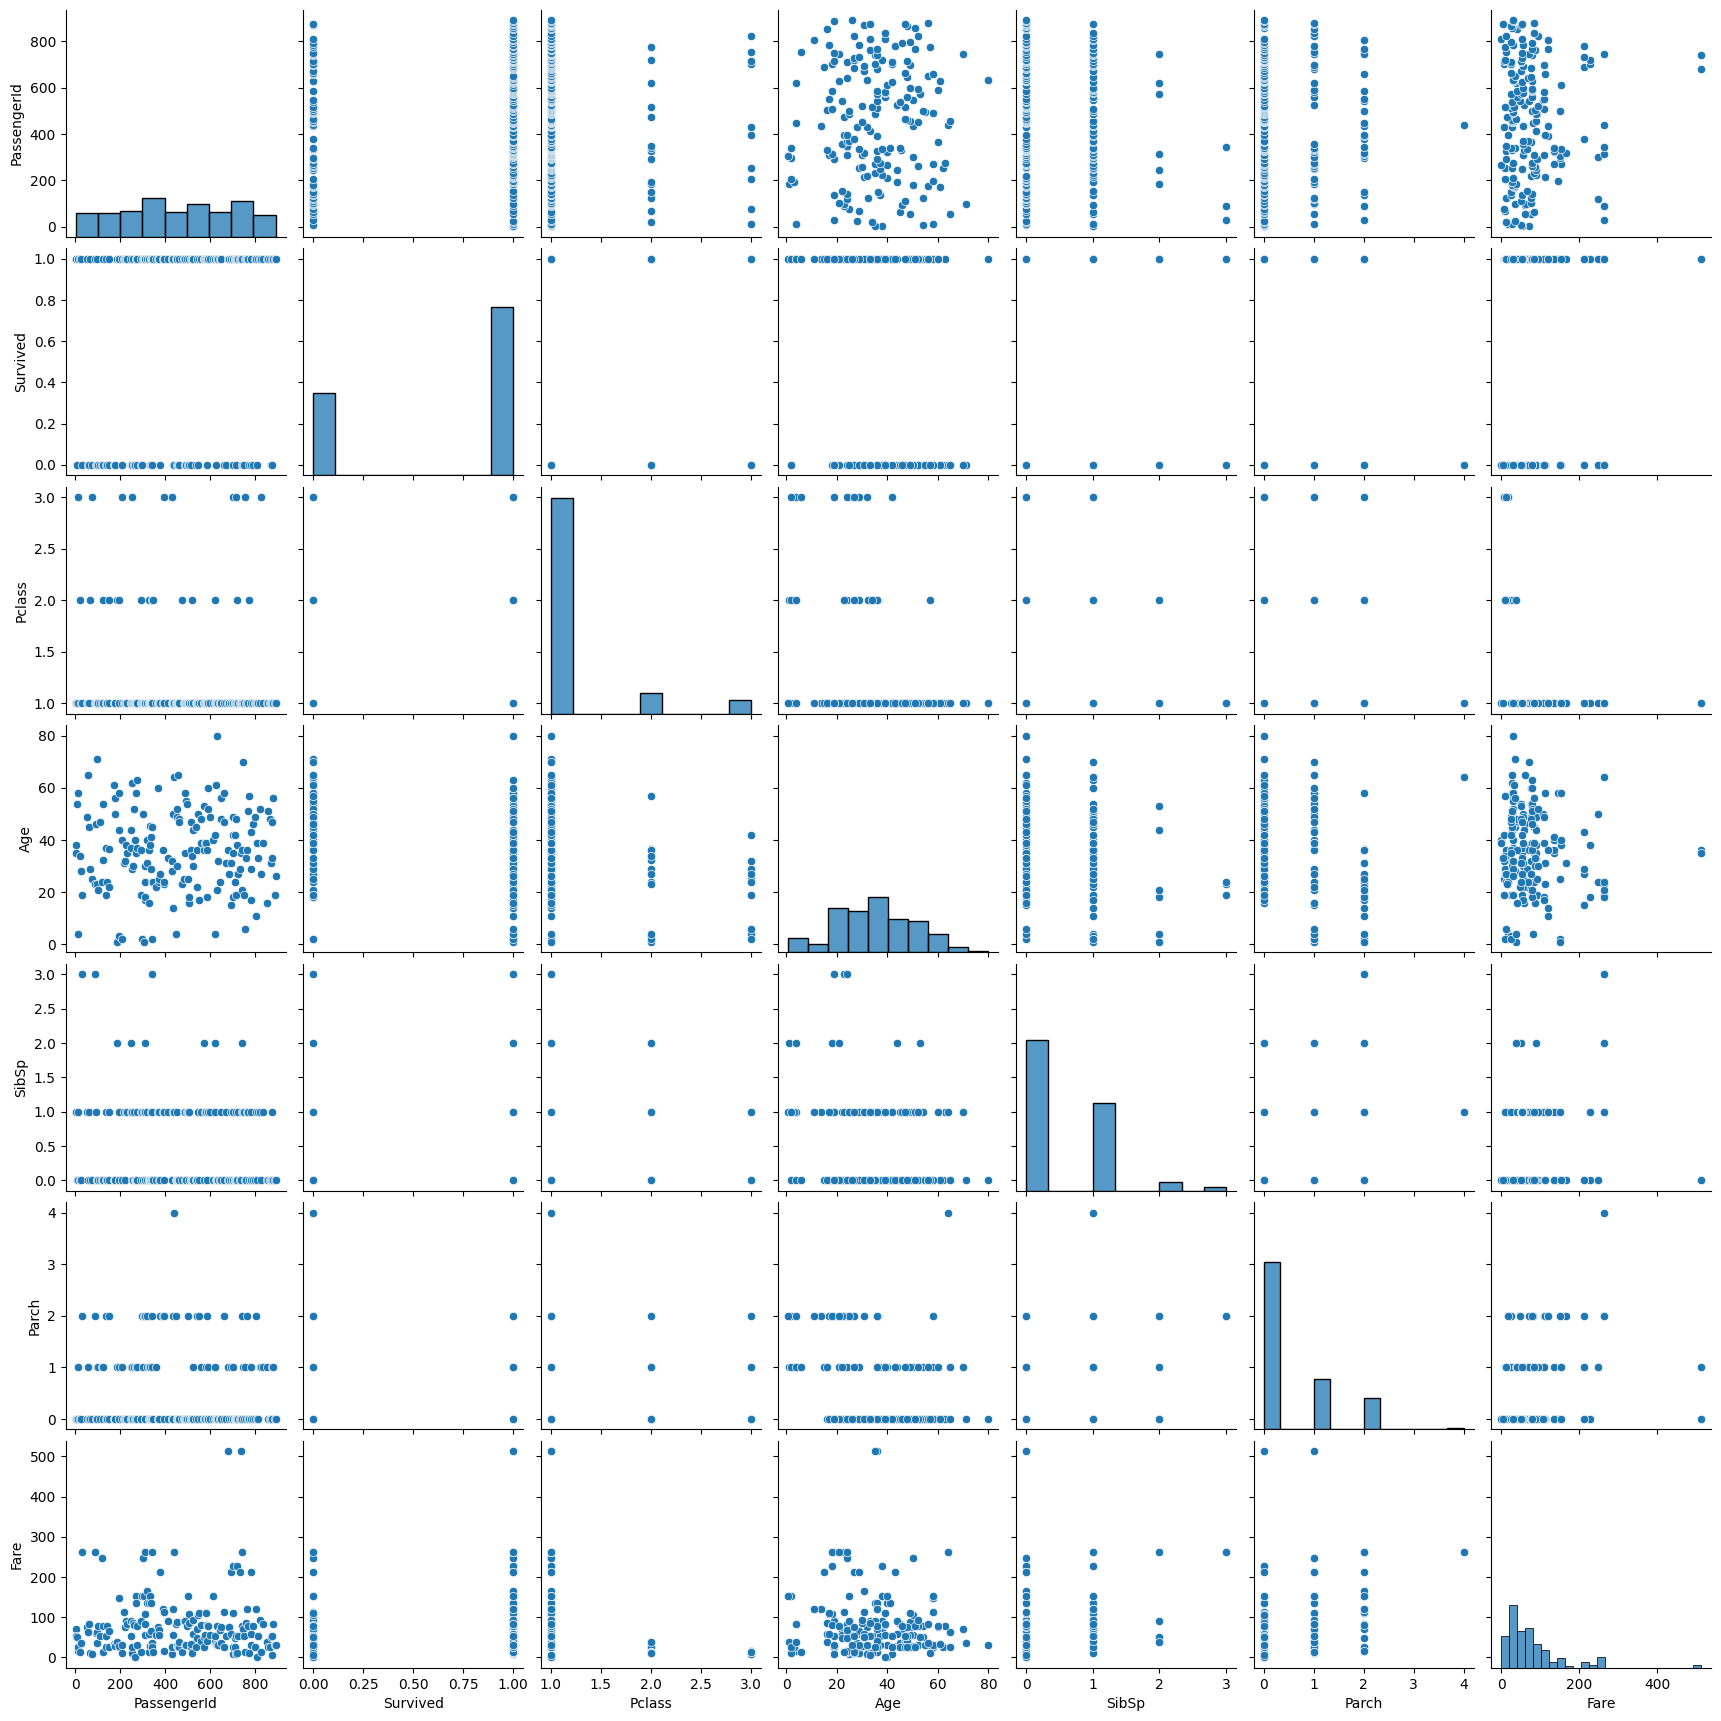

In [17]:
#doesn't work unless you remove missing datapoints, which we did above
sns.pairplot(data)

In [18]:
#classifying our features
#will add string based ones later
features = ['Pclass', 'Age', 'SibSp']

In [19]:
#making inputs and outputs

x = data[features] 
#x is our inputs
y = data.Survived 
#y is the chance they survived

In [20]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(x,y, random_state = 7, train_size = 0.7)
#random_state helps us randomize what data point goes to train vs test

In [21]:
train_X.head()

,Pclass,Age,SibSp
102,1,21.0,0
515,1,47.0,0
390,1,36.0,1
835,1,39.0,1
273,1,37.0,0


In [22]:
#do DTC
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 66)
model.fit(train_X, train_y)

DecisionTreeClassifier(random_state=66)

In [23]:
#actually do the guesswork here
from sklearn.metrics import classification_report
y_pred = model.predict(val_X)
print(classification_report(val_y, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.25      0.26        20
           1       0.59      0.63      0.61        35

    accuracy                           0.49        55
   macro avg       0.44      0.44      0.44        55
weighted avg       0.48      0.49      0.48        55



In [24]:
#so this guessing is really not good, our job is to fix this issue to make it more accurate
#it had really low precision and recall - it was literally better to just guess 50-50